## 1. Load and Explore the Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:/Users/prana/Downloads/Gunnels.csv")

In [2]:
df.head()

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,1,0,786,190,10,0.1,0,3,0,0,0
1,2,0,794,182,10,0.0,0,3,0,0,0
2,3,0,798,178,20,0.0,0,1,0,0,0
3,4,0,800,176,70,0.3,0,1,0,1,0
4,5,0,804,172,40,0.3,0,1,0,1,0


In [3]:
# Dimension and Summary
print("Dimensions:", df.shape)
print("Column Names:", df.columns)
print("Data Types:\n", df.dtypes)
print("Summary:\n", df.describe(include='all'))

Dimensions: (1592, 11)
Column Names: Index(['rownames', 'Gunnel', 'Time', 'Fromlow', 'Slope', 'Rw', 'Amphiso',
       'Subst', 'Pool', 'Water', 'Cobble'],
      dtype='object')
Data Types:
 rownames      int64
Gunnel        int64
Time          int64
Fromlow       int64
Slope         int64
Rw          float64
Amphiso       int64
Subst         int64
Pool          int64
Water         int64
Cobble        int64
dtype: object
Summary:
           rownames       Gunnel         Time      Fromlow        Slope  \
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000   
mean    796.500000     0.030151   705.243719   149.408920     9.503769   
std     459.715129     0.171056   135.853638    82.662326    15.889862   
min       1.000000     0.000000   340.000000     0.000000     0.000000   
25%     398.750000     0.000000   623.000000    71.750000     0.000000   
50%     796.500000     0.000000   712.500000   158.000000     0.000000   
75%    1194.250000     0.000000   810.000000   2

## Module 2: Data Transformation

In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Replace missing values in 'agefirstbirth' with mean or median
df['agefirstbirth'].fillna(df['agefirstbirth'].mean(), inplace=True)

<ipython-input-5-135a6b81b4e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agefirstbirth'].fillna(df['agefirstbirth'].mean(), inplace=True)


In [7]:
# Discretization example
df['Time_category'] = pd.cut(df['Time'], bins=[0, 5, 10, 20, np.inf], labels=["Very Short", "Short", "Medium", "Long"])

## Module 3: Correlation Analysis & Time Series Analysis

In [8]:
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

          rownames    Gunnel      Time   Fromlow     Slope        Rw  \
rownames  1.000000  0.049300  0.322613  0.021956 -0.201555  0.080318   
Gunnel    0.049300  1.000000 -0.147345 -0.237442 -0.003742  0.059315   
Time      0.322613 -0.147345  1.000000  0.215593 -0.076922  0.047812   
Fromlow   0.021956 -0.237442  0.215593  1.000000  0.090586 -0.348612   
Slope    -0.201555 -0.003742 -0.076922  0.090586  1.000000  0.019566   
Rw        0.080318  0.059315  0.047812 -0.348612  0.019566  1.000000   
Amphiso  -0.151166  0.092853 -0.094952 -0.118838 -0.078461  0.230164   
Subst     0.014867  0.167311 -0.045537 -0.061721 -0.250251 -0.118785   
Pool      0.157931  0.075823  0.140445 -0.098623 -0.068931  0.107987   
Water     0.101224  0.085071  0.072215 -0.187175 -0.065498  0.344206   
Cobble    0.030921  0.213397  0.008813 -0.064347 -0.124665  0.075399   

           Amphiso     Subst      Pool     Water    Cobble  
rownames -0.151166  0.014867  0.157931  0.101224  0.030921  
Gunnel    0.0

In [10]:
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

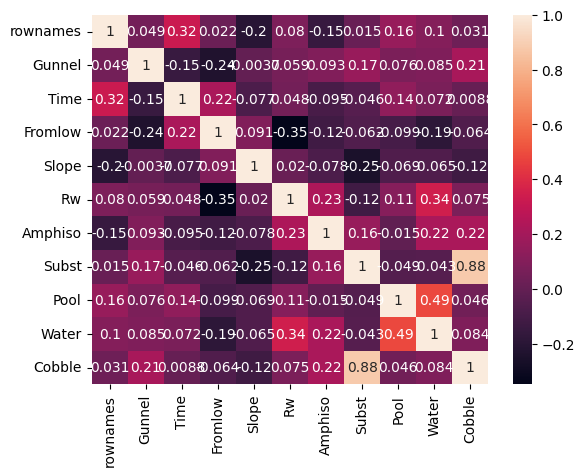

In [11]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Module 4: Data Summarization and Visualization

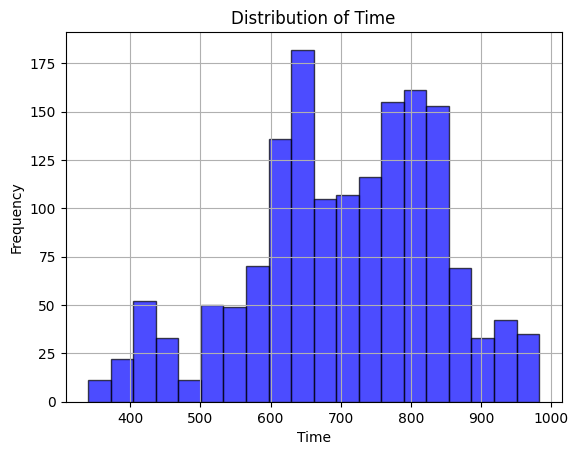

In [12]:
# Univariate analysis example
# Histogram for the 'Time' column (replace with your desired column name)
df['Time'].hist(bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.show()


<Axes: xlabel='Time', ylabel='Slope'>

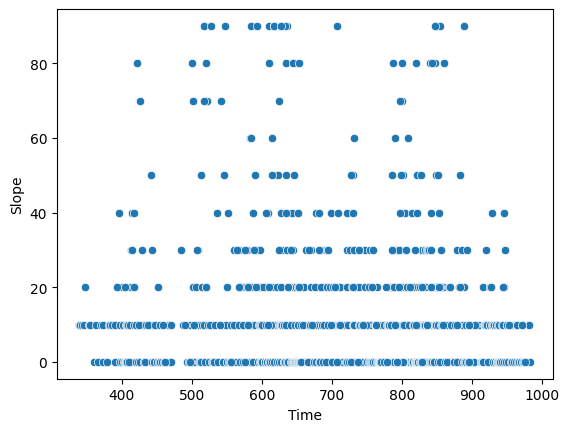

In [13]:
# Bivariate scatter plot
sns.scatterplot(x='Time', y='Slope', data=df)

## Module 5: Clustering Analysis

c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


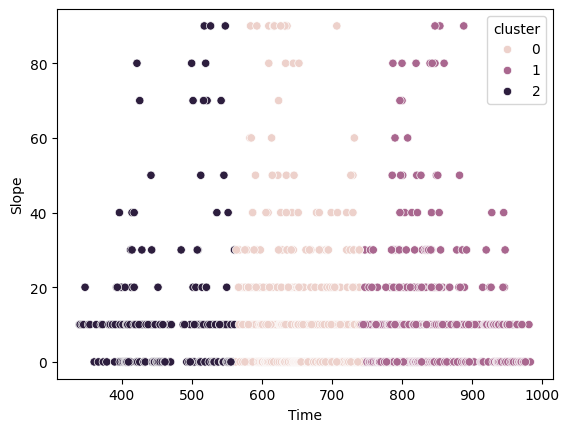

In [14]:
from sklearn.cluster import KMeans

# K-Means Clustering on Time and Slope
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Time', 'Slope']])
sns.scatterplot(x='Time', y='Slope', hue='cluster', data=df)
plt.show()

## Module 6: Dimensionality Reduction

<Axes: xlabel='PC1', ylabel='PC2'>

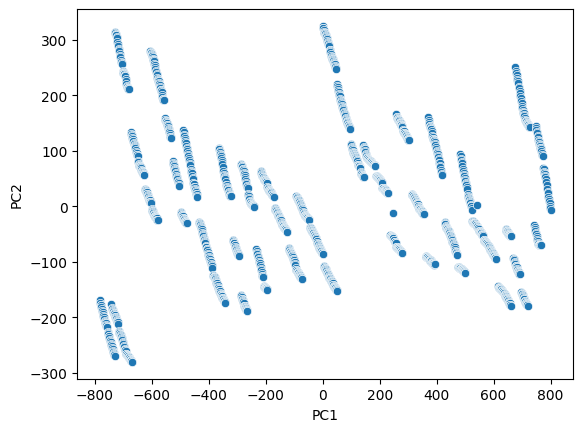

In [15]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.select_dtypes(include=[np.number]).dropna())
df['PC1'], df['PC2'] = principal_components[:, 0], principal_components[:, 1]
sns.scatterplot(x='PC1', y='PC2', data=df)

## Module 7: Model Development and Evaluation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression example
model = LinearRegression()
X = df[['Time', 'Slope']].dropna()
y = df['Rw'].dropna()
model.fit(X, y)
predictions = model.predict(X)

In [19]:
# Evaluation
print("R² Score:", r2_score(y, predictions))
print("MAE:", mean_absolute_error(y, predictions))

R² Score: 0.0028295081522551335
MAE: 0.3942385702897489
